**Question 4 - Data Visualization**

Data visualization is an effective method to overall evaluate the quality of the data. Generally, the conventional visualizations include column histogram/chart, pie chart, venn diagram, scatter plot, heatmap, etc.

1. Assume we have a set of employee records containing employee ID (Integer; 1-500), department (Categorical; HR, IT, Sales), sex (Binary; Male/Female), and years of experience (Integer; 0-40), we intend to analyze these attributes by visualization. Which visualization technique should be selected for different attributes?

2. Write a Python Program to randomly generate 500 employee records based on the above descriptions and visualize the generated data using your selected techniques.

3. Calculate the number of employees per department and visualize the results using a bar chart for the generated data.

4. Attention[1] is a classic and popular technique in natural language processing. Given two vectors Q ∈ R5×10 and K ∈ R5×10, the attention score of Q and K are calculated as:

    Attention Score(Q, K) = softmax( QKT/√dk ), where dk is the hidden dimension (10 in this case).
    
    Please randomly initialize Q and K vectors and visualize the attention score via heatmap.

-----------------------------------------------------------------------------------------------------------------------

**1)**

    Employee ID: Scatter Plot

    Department: Pie Chart

    Sex: Bar Chart

    Years of Experience: Box Plot


**2)**

In [34]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

employee_data = {
    'Employee ID': np.arange(1, 501),
    'Department': np.random.choice(['HR', 'IT', 'Sales'], 500),
    'Sex': np.random.choice(['Male', 'Female'], 500),
    'Years of Experience': np.random.randint(0, 41, 500)
}

employees_df = pd.DataFrame(employee_data)

employees_df

,Employee ID,Department,Sex,Years of Experience
0,1,Sales,Female,18
1,2,HR,Female,20
2,3,Sales,Male,4
3,4,Sales,Female,17
4,5,HR,Female,27
...,...,...,...,...
495,496,IT,Male,8
496,497,IT,Female,39
497,498,HR,Female,16
498,499,IT,Male,0


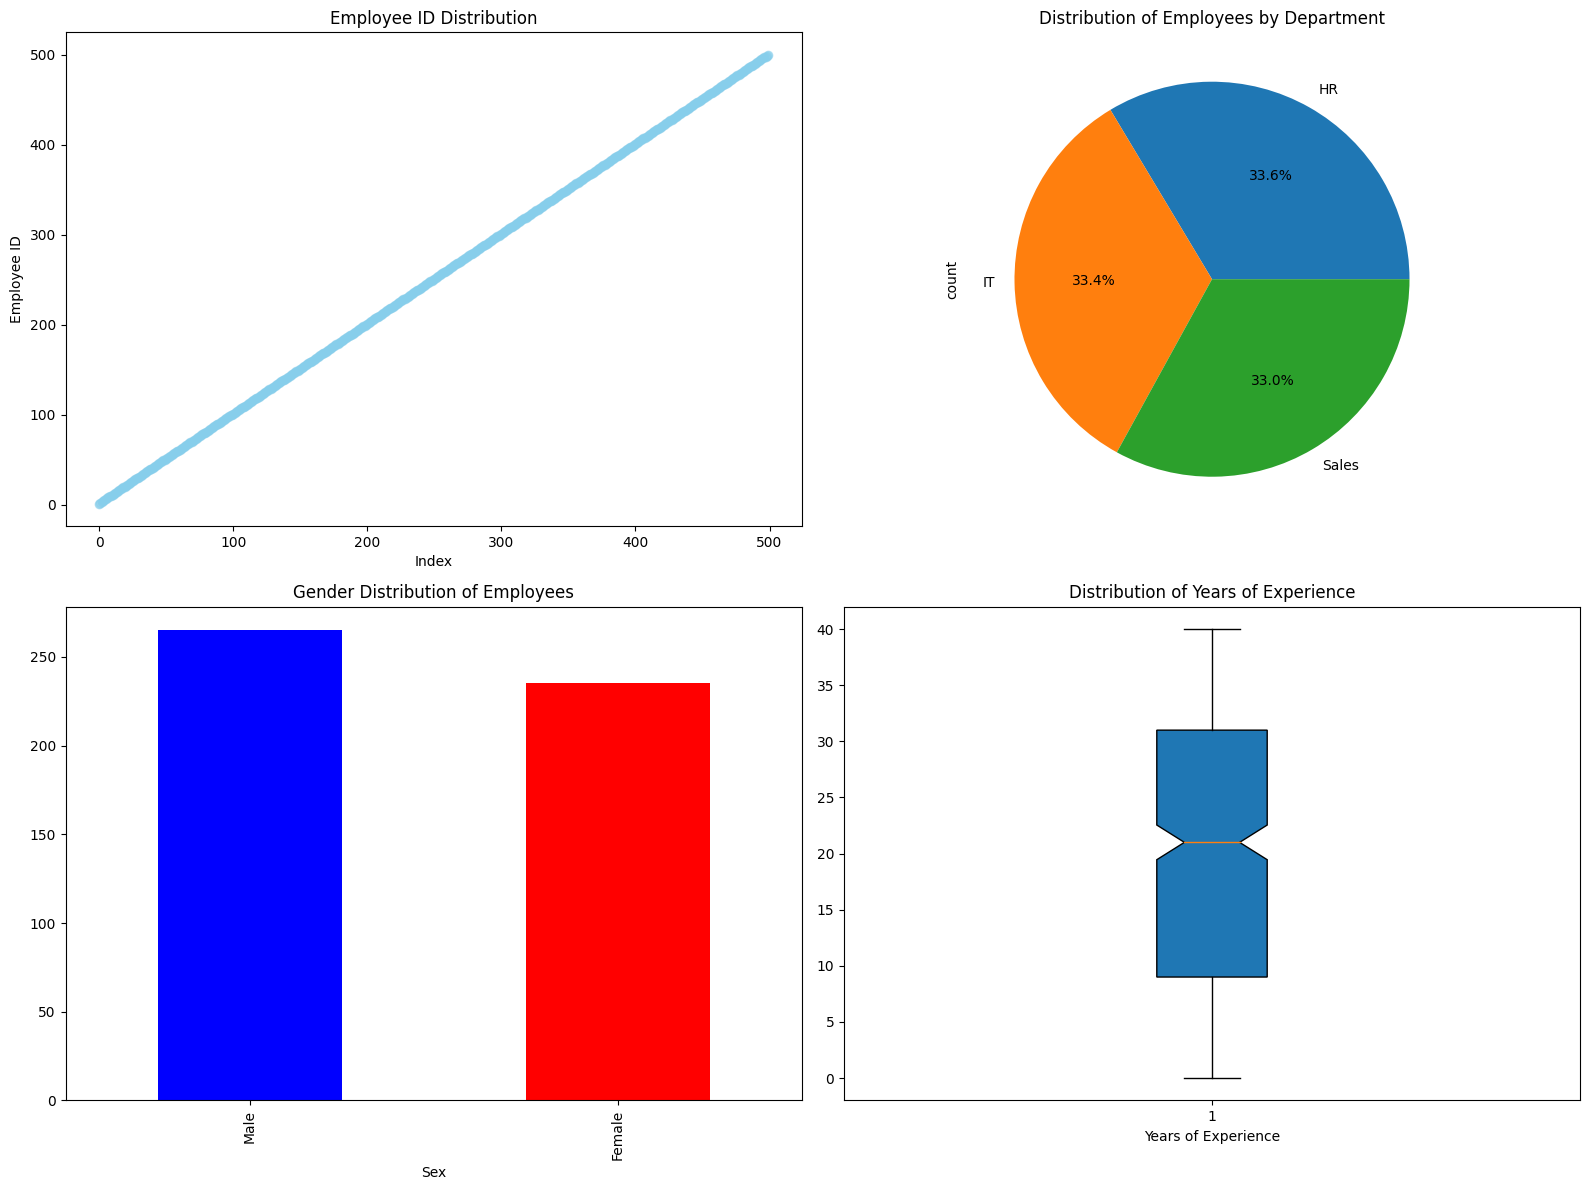

In [35]:
plt.figure(figsize=(16, 12))

# Employee ID (Scatter Plot)
plt.subplot(2, 2, 1)
plt.scatter(employees_df.index, employees_df['Employee ID'], color='skyblue', alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Employee ID')
plt.title('Employee ID Distribution')

# Department (Pie Chart)
plt.subplot(2, 2, 2)
employees_df['Department'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Employees by Department')

# Sex (Bar Chart)
plt.subplot(2, 2, 3)
employees_df['Sex'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Gender Distribution of Employees')

# Experience (Box Plot)
plt.subplot(2, 2, 4)
plt.boxplot(employees_df['Years of Experience'], patch_artist=True, notch=True, vert=1)
plt.xlabel('Years of Experience')
plt.title('Distribution of Years of Experience')

plt.tight_layout()
plt.show()

**3)**

In [36]:
# Calculate the number of employees per department
department_counts = employees_df['Department'].value_counts()

department_counts

Department
HR       168
IT       167
Sales    165
Name: count, dtype: int64

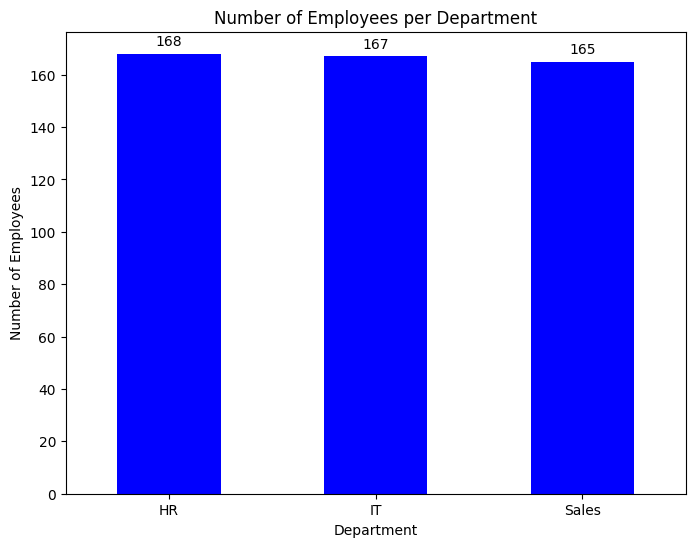

In [37]:
# Visualize the results using a bar chart
plt.figure(figsize=(8, 6))
department_counts.plot(kind='bar', color='blue')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Number of Employees per Department')
plt.xticks(rotation=0)
for i, value in enumerate(department_counts):
    plt.text(i, value + 2, str(value), ha='center', va='bottom')

plt.show()

**4)**

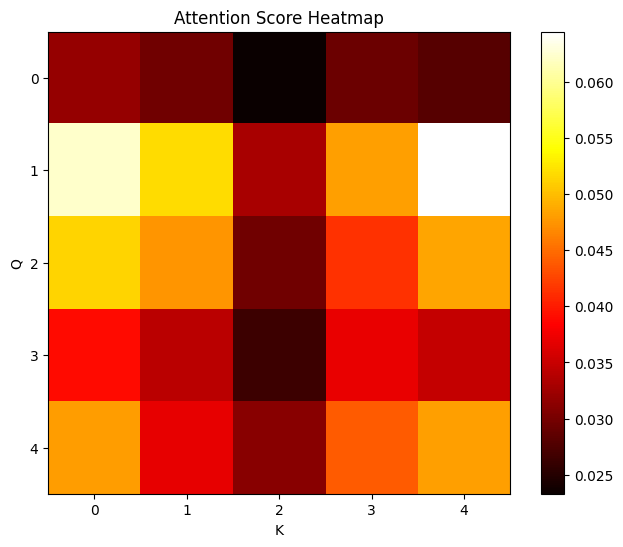

In [38]:
from scipy.special import softmax

Q = np.random.rand(5, 10)
K = np.random.rand(5, 10)
dk = 10

# Calculate attention score
attention_score = softmax(np.dot(Q, K.T)/np.sqrt(dk))

# Visualize the attention score via heatmap
plt.figure(figsize=(8, 6))
plt.imshow(attention_score, cmap='hot', interpolation='nearest')
plt.title('Attention Score Heatmap')
plt.xlabel('K')
plt.ylabel('Q')
plt.colorbar()
plt.show()